# Can we predict the pleasentness (Valence) of a substance based on its perceptual descriptors? And how does that depend on the intensity of the substance (dilution)?

Basically, yes we can (probably). Some descriptors have very strong correlation with valence.

Data preprocessing and EDA:
* Look at the distribution of ratings. Are they the same for each subject? Do we need to correct/re-scale them?
* Do the above for each dilution

Basic analysis:
* PCA of the descriptors set, also with subsets for each dilution. Whats the difference? Are the same descriptors associated with pleasentness?
* Some first regression for maybe the top correlated descriptors or principal components.
* Unsupervised clustering of subjects or descriptors

Advanced analysis 1:
* Supervised learning of valence from descriptors

Advanced analysis 2:
* Go to the molecular descriptors and associate them with the perceptual descriptors. Which molecular descriptors are important?
* Is it more likely that single molecular descriptors are responsible for valence or are there combinations of molecular properties that behave synergistic?


New Ideas

- Feature engineering: Add two predictors together (sum)
- Go through the lectures and just apply all that we covered (in the exercises)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_table("data/TrainSet.txt")
df.shape

(35084, 27)

In [ ]:
perc = df[df.columns[5:]]
perc = perc.rename(columns={"VALENCE/PLEASANTNESS": "valence"})
perc["intensity"] = df["Intensity"].replace({"high ": 1, "low ": 0})
perc["comp"] = df["Compound Identifier"]

# Part 1
EDA

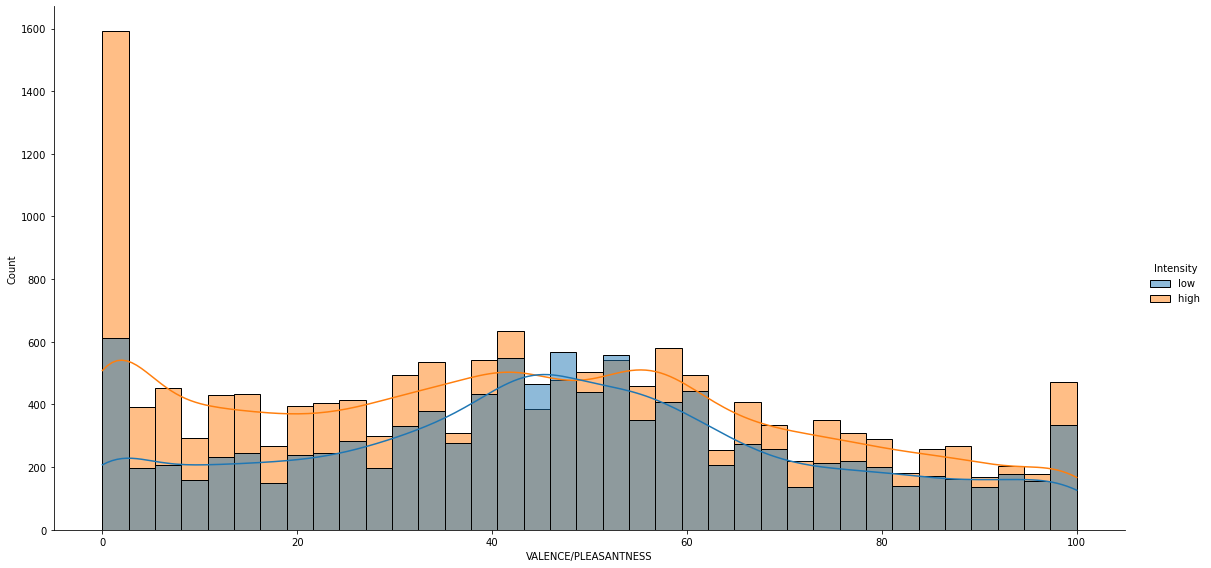

In [4]:
#compare intensities
sns.displot(data=df, x="VALENCE/PLEASANTNESS", kde=True, hue="Intensity", height=8, aspect=2)
plt.show()

At high intensities, more substances are rated as unpleasent.

In [6]:
perc

,subject #,INTENSITY/STRENGTH,valence,BAKERY,SWEET,FRUIT,FISH,GARLIC,SPICES,COLD,...,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL,intensity,comp
0,1,7,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0,126
1,1,37,60.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,126
2,2,55,89.0,0.0,33.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,126
3,2,64,71.0,0.0,9.0,2.0,0.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1,126
4,3,89,68.0,0.0,62.0,0.0,0.0,0.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35079,47,42,77.0,56.0,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6999977
35080,48,0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6999977
35081,48,22,96.0,0.0,58.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1,6999977
35082,49,72,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,9.0,0.0,2.0,0.0,0.0,0.0,3.0,0,6999977


In [7]:
comps = perc["comp"].unique()
rep = dict(zip(comps, range(len(comps))))
perc["comp"] = perc["comp"].replace(rep)

C:\Users\Alex\AppData\Local\Temp/ipykernel_20024/3431666293.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  order = perc.groupby("comp")["comp", "valence"].mean()


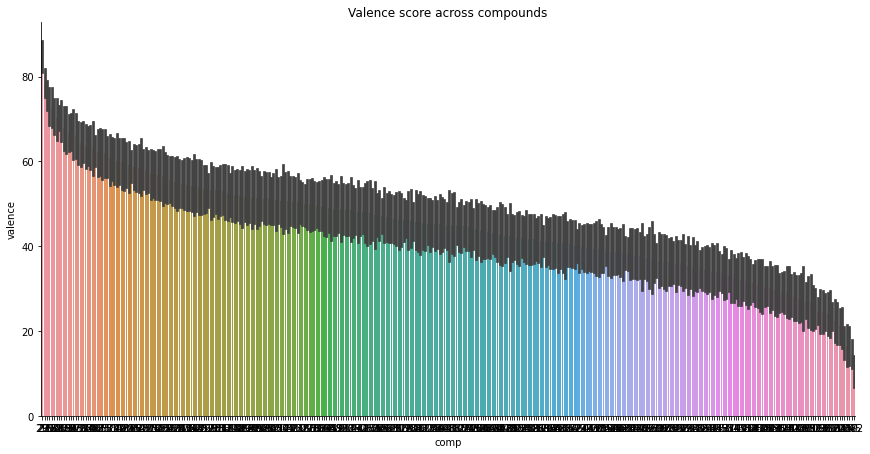

In [8]:
order = perc.groupby("comp")["comp", "valence"].mean()
order = order.sort_values("valence", ascending=False)
sns.catplot(data=perc, x="comp", y="valence", kind="bar", order=order["comp"], height=6, aspect=2)
plt.title("Valence score across compounds")
plt.show()


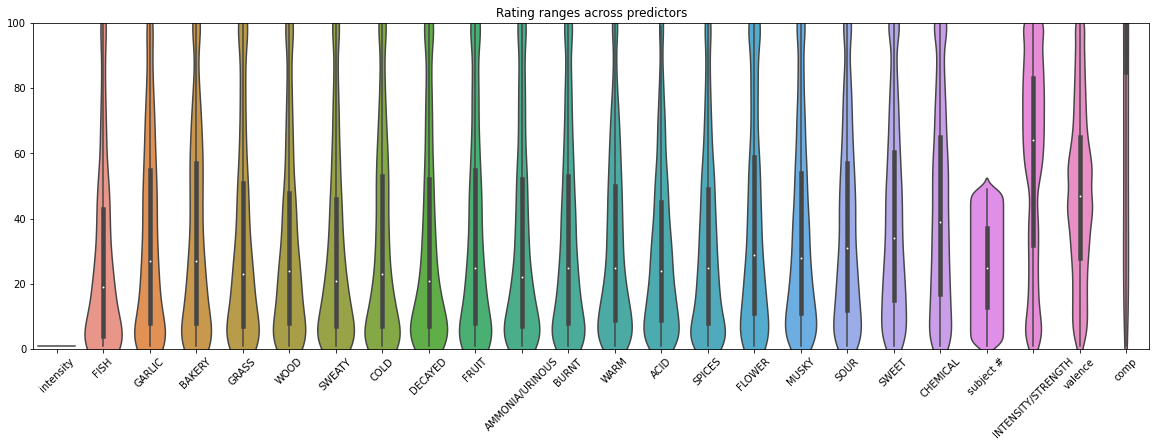

In [58]:
sorted_index = perc.mean().sort_values().index
perc_sorted = perc[sorted_index]

plt.figure(figsize=[20,6])
sns.violinplot(data=perc_sorted[perc_sorted > 0])
plt.xticks(rotation=45)
plt.ylim([0,100])
plt.title("Rating ranges across predictors")
plt.show()

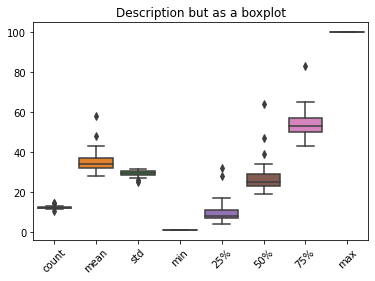

In [46]:
desc = perc[perc > 0].describe()
desc = desc.drop(columns=["subject #", "intensity", "comp"]).T
desc["count"] = np.log2(desc["count"])
sns.boxplot(data=desc)
plt.xticks(rotation=45)
plt.title("Description but as a boxplot")
plt.show()

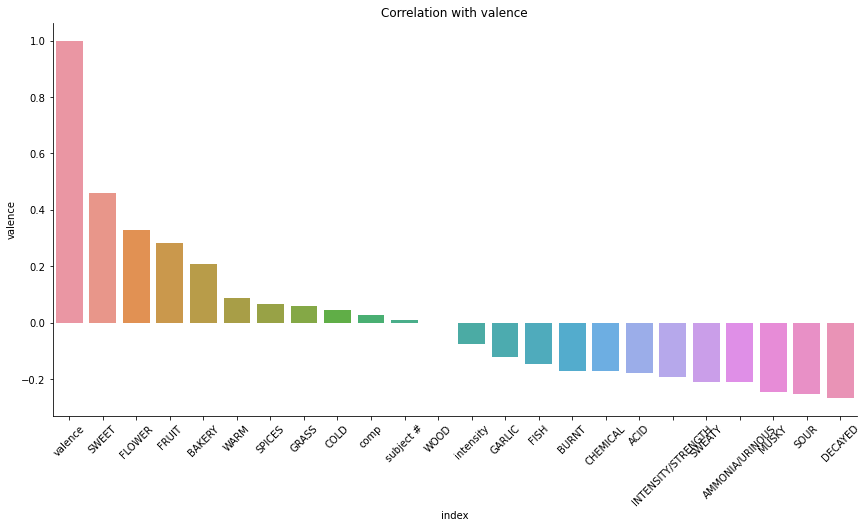

In [11]:

corm = perc.corr()["valence"]
corm = corm.sort_values(ascending=False)
corm = corm.reset_index()
sns.catplot(data=corm, x="index", y="valence", kind="bar", height=6, aspect=2)
plt.title("Correlation with valence")
plt.xticks(rotation=45)
plt.show()

# Part 2: Regression & Prediction

In [474]:
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.api as stats
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import plot_tree


#### Data Preparation

In [108]:
# remove NAs (naively)
percnn = perc.dropna()
# scale data
scaler = StandardScaler()
scaled = scaler.fit_transform(percnn)

lost_low = perc.query("intensity == 0").shape[0] - percnn.query("intensity == 0").shape[0]
lost_high = perc.query("intensity == 1").shape[0] - percnn.query("intensity == 1").shape[0]
print(f'Lost {perc.shape[0] - percnn.shape[0]} rows. {lost_low} in low, {lost_high} in high')
percnn.head()

Lost 9104 rows. 6782 in low, 2322 in high


,subject #,INTENSITY/STRENGTH,valence,BAKERY,SWEET,FRUIT,FISH,GARLIC,SPICES,COLD,...,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL,intensity,comp
0,1,7,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0,126
1,1,37,60.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,126
2,2,55,89.0,0.0,33.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,126
3,2,64,71.0,0.0,9.0,2.0,0.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1,126
4,3,89,68.0,0.0,62.0,0.0,0.0,0.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,126


(25980, 24)
(25980, 24)


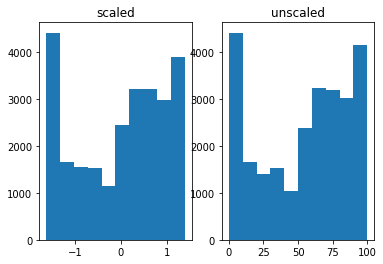

In [136]:
print(scaled.shape)
print(percnn.shape)

In [151]:
cols = list(percnn.columns)
data_indices = [cols.index(x) for x in data]
label_index = cols.index("valence")

In [154]:
# label & predictor columns
labels = ["valence"]
data = ['INTENSITY/STRENGTH', 'BAKERY', 'SWEET','FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID',
       'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD','GRASS', 'FLOWER', 'CHEMICAL']

X, x, Y, y = train_test_split(percnn[data], percnn[labels])
Xs, xs, Ys, ys = train_test_split(scaled[:,data_indices], scaled[:,label_index])
print(X.shape)
print(Y.shape)
print(Xs.shape)
print(Ys.shape)

(19485, 20)
(19485, 1)
(19485, 20)
(19485,)


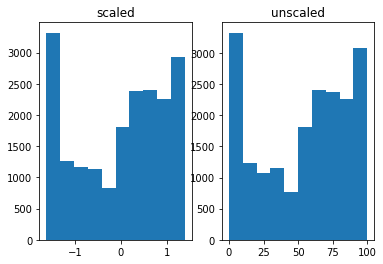

looks good


In [163]:
# check if the indices are the same for both datasets
plt.figure()
plt.subplot(1,2,1)
plt.hist(Xs[:,0])
plt.title("scaled")
plt.subplot(1,2,2)
plt.hist(X.iloc[:,0])
plt.title("unscaled")
plt.show()
print("looks good")

### Ridgeregeression with crossvalidation, scaled vs unscaled features

In [86]:
# calculate size of cv group, use suareroot as ssuggested in lecture
cv_fold = int(np.sqrt(percnn.shape[0]))

In [139]:
rcv = RidgeCV(alphas=(0.1, 1, 10), cv=cv_fold)
rcvs = RidgeCV(alphas=(0.1, 1, 10), cv=cv_fold)

In [165]:
rcv.fit(X,Y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=161)

In [164]:
rcvs.fit(Xs,Ys)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=161)

In [169]:
rcv.score(x, y)

0.42793768472769766

In [167]:
rcvs.score(xs, ys)

0.44203900443591504

### Set up RidgeRegression functioins

In [276]:
def olfaction_tts(data=percnn, intensity=None):
    """ 
    takes olfaction data and returns X,x,Y,y
    scales data
    param intensity: select for high (1) or low (0) intensity, default=None (take whole dataset)
    """
    if intensity:
        data = data.query("intensity == @intensity")
    
    # transform the column labels to numerical indices
    labels = ["valence"]
    predictors = ['INTENSITY/STRENGTH', 'BAKERY', 'SWEET','FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID',
           'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD','GRASS', 'FLOWER', 'CHEMICAL']
    cols = ['subject #', 'INTENSITY/STRENGTH', 'valence', 'BAKERY', 'SWEET',
       'FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID',
       'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD',
       'GRASS', 'FLOWER', 'CHEMICAL', 'intensity', 'comp']
    
    predictor_indices = [cols.index(x) for x in predictors]
    label_index = cols.index("valence")
    
    # scale the data
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)
    # return the split
    return list(train_test_split(scaled[:,predictor_indices], scaled[:,label_index]))

In [281]:
def ridgecv(set_list, alphas=None):
    """
    Performs CV regression on the "set list" input which is list(X,x,Y,y)
    """
    if not alphas:
        alphas = (0.1, 1, 10)
    
    # cv_fold = int(np.sqrt(percnn.shape[0]))
    
    rcv = RidgeCV(alphas=alphas, cv=160)
    
    rcv.fit(set_list[0], set_list[2])
    
    print(f'score {rcv.score(set_list[1], set_list[3])}')
    return rcv

In [386]:
def evaluate(intensity=None):
    if intensity:
        tts = olfaction_tts(percnn, intensity)
    else:
         tts = olfaction_tts(percnn)   
    res = dict()

    for i in np.logspace(0.01, 2, 5):
        if i > 1:
            i=int(i)
        alpha=(i,i*10)
        cls = ridgecv(tts, alphas=alpha)
        res.update({str(alpha):cls})

    for k, v in res.items():
        print(k , "\t",v.best_score_)
    return res

## Evaluate Ridge regression

In [387]:
# model evaluation using high
high = evaluate(1)
# model evaluation using low
low = evaluate(0)
# model evaluation using both
both = evaluate(0)

score 0.43874666852673816
score 0.438750324021554
score 0.4387546640916399
score 0.43869313220842976
score 0.4387546640916399
(1, 10) 	 0.42135469154605215
(3, 30) 	 0.42136523110915736
(10, 100) 	 0.4213932589073416
(31, 310) 	 0.4213991518628749
(100, 1000) 	 0.4213932589073416
score 0.4379601432978013
score 0.43795177759711357
score 0.4379196610922047
score 0.43779771194137485
score 0.4379196610922047
(1, 10) 	 0.41628160681020265
(3, 30) 	 0.41628514482765977
(10, 100) 	 0.41629452122241223
(31, 310) 	 0.4162954908595182
(100, 1000) 	 0.41629452122241223
score 0.43122900674355136
score 0.43123060868393115
score 0.4312331547588363
score 0.43121311681760377
score 0.4312331547588363
(1, 10) 	 0.4187993001677842
(3, 30) 	 0.4188035324767533
(10, 100) 	 0.41881525505196493
(31, 310) 	 0.41882249662164606
(100, 1000) 	 0.41881525505196493


In [389]:
X,x,Y,y =  olfaction_tts(data=percnn, intensity=None)
b = list()
h = list()
l = list()
for k, v in both.items():
    b.append(v.score(x,y))
for k, v in high.items():
    h.append(v.score(x,y))
for k, v in low.items():
    l.append(v.score(x,y))

In [390]:
results = pd.DataFrame({"both":b, "high":h, "low":l, "alpha":list(both.keys())})
r = results.melt(id_vars="alpha")

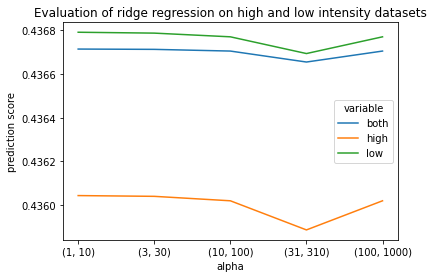

In [392]:
sns.lineplot(data=r, x="alpha", y="value",hue="variable")
plt.title("Evaluation of ridge regression on high and low intensity datasets")
plt.ylabel("prediction score")
plt.show()

### Single DecisionTreeRegressor

In [475]:
def evaluate_trees(data=percnn):
    b, B, l, L, H, h = list(), list(), list(), list(), list(), list()
    sets = olfaction_tts(data=data, intensity=0)
    d = list(range(6,10))
    for depth in d:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(sets[0], sets[2])
        l.append(regr.score(sets[1], sets[3]))
        L.append(regr)
    sets = olfaction_tts(data=data, intensity=1)
    for depth in d:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(sets[0], sets[2])
        h.append(regr.score(sets[1], sets[3]))
        H.append(regr)
    sets = olfaction_tts(data=data, intensity=None)
    for depth in d:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(sets[0], sets[2])
        b.append(regr.score(sets[1], sets[3]))  
        B.append(regr)
    
    return b, l, h, d, B, L, H

In [476]:
aggregate = pd.DataFrame()
for it in range(100):
    b, l, h, d, B, L, H = evaluate_trees()
    tree_result = pd.DataFrame({"both":b, "high":h, "low":l, "depth":d, "it":[it] * len(d)})
    #trees = pd.DataFrame({"both":B, "high":H, "low":L, "depth":d, "it":[it] * len(d)})
    rt = tree_result.melt(id_vars=["depth", "it"])
    aggregate = aggregate.append(rt, ignore_index=True)

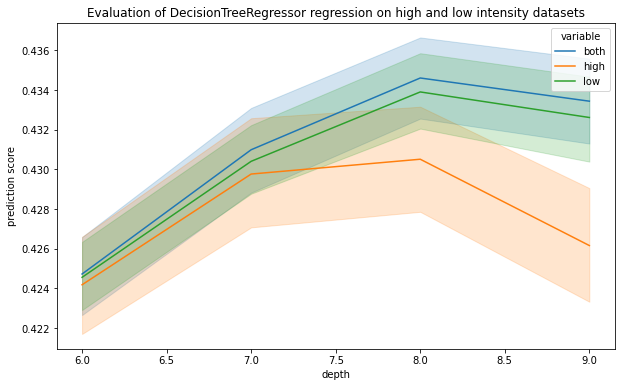

In [505]:
plt.figure(figsize=[10,6])
sns.lineplot(data=aggregate, x="depth", y="value",hue="variable")
plt.title("Evaluation of DecisionTreeRegressor regression on high and low intensity datasets")
plt.ylabel("prediction score")
plt.show()

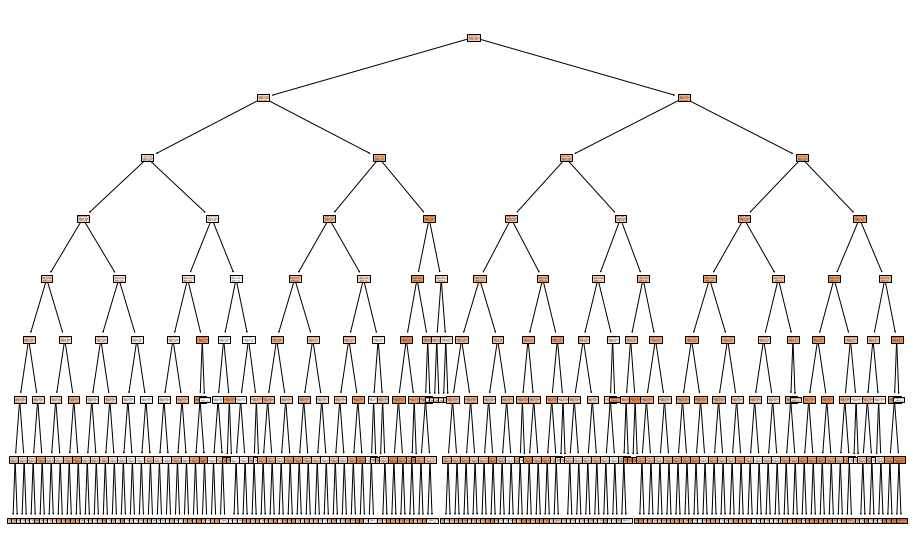

In [506]:
plt.figure(figsize=(16,10))
tree_fig = plot_tree(B[2], filled=True)

### The trees rely heavily on SWEETness

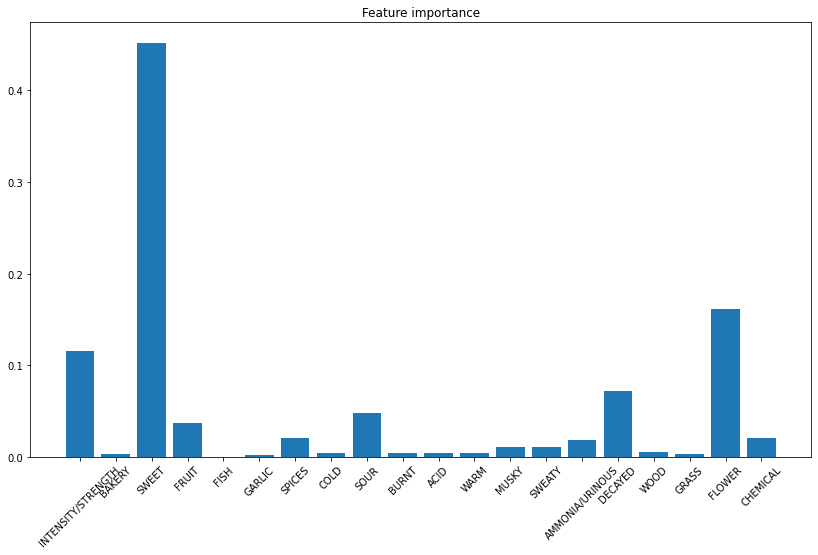

In [504]:
plt.figure(figsize=(14,8))
dat = B[2].feature_importances_ 
plt.bar(height=dat, x=['INTENSITY/STRENGTH', 'BAKERY', 'SWEET','FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID',
           'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD','GRASS', 'FLOWER', 'CHEMICAL'])
plt.xticks(rotation=45)
plt.title("Feature importance")
plt.show()

### Random Forest regressors

In [510]:
from sklearn.ensemble import RandomForestRegressor

X,x,Y,y = olfaction_tts()
score=list()
deps = list(range(7,17))
for dep in deps:
    rf = RandomForestRegressor(max_depth=dep, random_state=0)
    rf.fit(X, Y)
    score.append(rf.score(x,y))
    

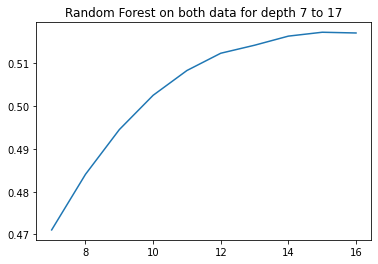

In [512]:
plt.plot(deps, score)
plt.title("Random Forest on both data for depth 7 to 17")
plt.show()

In [522]:
def eval_rf(intensity):
    X,x,Y,y = olfaction_tts(intensity=intensity)
    score=list()
    deps = list(range(12,20))
    
    for dep in deps:
        rf = RandomForestRegressor(max_depth=dep, random_state=0)
        rf.fit(X, Y)
        score.append(rf.score(x,y))
        
    return score

In [523]:
low1 = eval_rf(0)
low2 = eval_rf(0)
low3 = eval_rf(0)
high1 = eval_rf(1)
high2 = eval_rf(1)
high3 = eval_rf(1)
both1 = eval_rf(None)
both2 = eval_rf(None)
both3 = eval_rf(None)

In [535]:
low = low1 + low2 + low3
high = high1 + high2 + high3
both = both1 + both2 + both3
rep = [1] * len(low1) + [2] * len(low1) + [3] * len(low1)
depth = list(range(12,20)) * 3
rf_df = pd.DataFrame({"low": low, "high":high, "both": both, "depth":depth, "rep":rep})
rf_df = rf_df.melt(id_vars=["depth", "rep"])

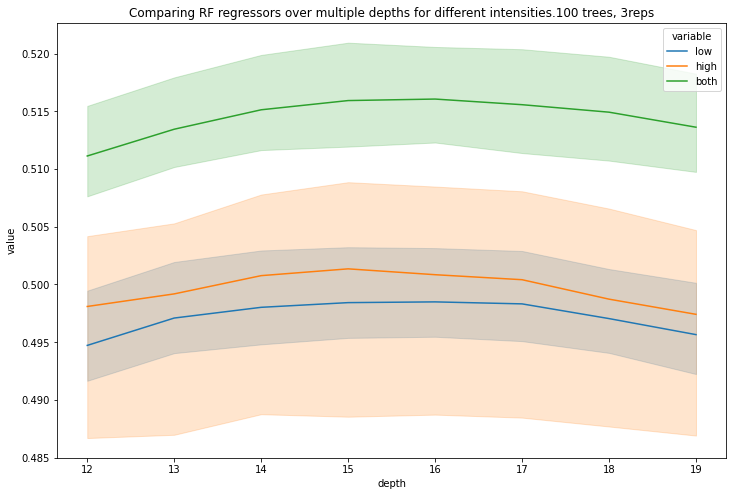

In [545]:
plt.figure(figsize=(12,8))
sns.lineplot(data=rf_df, x="depth", y="value", hue="variable")
plt.title("Comparing RF regressors over multiple depths for different intensities.100 trees, 3reps")
plt.show()

In [544]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### Predictions with Neural Networks